In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = pd.DataFrame(data = (datasets.load_iris()).data[:,:])
features = iris.iloc[:,:].values

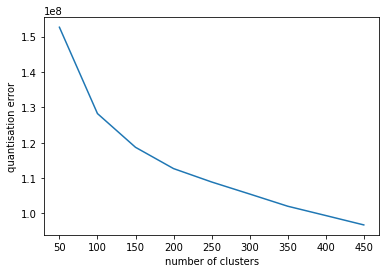

In [65]:
#finding optimum number of clusters for K-Means by Elbow method
from sklearn.cluster import KMeans

qe = [] #qe is the abbreviation for quantisation error
k_for_KMeans = [50,100,150,200,250,300,350,400,450]
for i in k_for_KMeans:
    kmeans = KMeans(n_clusters=i, init = 'k-means++', n_init = 1)
    kmeans.fit(features)
    qe.append(kmeans.inertia_)

plt.plot(k_for_KMeans, qe)
plt.xlabel('number of clusters')
plt.ylabel('quantisation error')
plt.show()

### Therefore, optimal number of clusters for Oxford flower dataset is 100

In [49]:
#calculate the time taken and the quantisation error on each of the methods
import time

qerror = []
time_taken = []

start = time.clock()
qe1 = 0
for i in range(10):
    kmeans1 = KMeans(n_clusters=100, init = 'k-means++', n_init = 10)
    kmeans1.fit(features)
    qe1 += kmeans.inertia_
t1 = (time.clock()-start)/100
qe1 /= 10
print (t1,qe1)
qerror.append(qe1)

start = time.clock()
qe2 = 0
for i in range(10):
    kmeans2 = KMeans(n_clusters=100, init = 'random', n_init = 10)
    kmeans2.fit(features)
    qe2 += kmeans.inertia_
t2 = (time.clock()-start)/100
qe2 /= 10
print (t2,qe2)
qerror.append(qe2)

1.618425599720831 127850395.05191128
1.2712490367089777 128792894.06808507


In [53]:
import kmc2

chain_lengths = [1,10,100,500,1500,5000]
qe_kmc2 = []
qe_afkmc2 = []
su_kmc2 = []    #speed-up for K-MCMC
su_afkmc2 = []  #speed-up for AFK-MCMC

for i in chain_lengths:
    qe3 = 0
    start = time.clock()
    for j in range(10):
        seeding = kmc2.kmc2(features, 100, chain_length = i, afkmc2 = False) # Run K-MCMC with k=150 and variable chain length
        kmeans3 = KMeans(n_clusters=100, init = seeding, n_init = 1)
        kmeans3.fit(features)
        qe3 += kmeans3.inertia_
    t3 = (time.clock()-start)/10
    su_kmc2.append(t1/t3)
    qe3 = qe3/10
    print (t3,qe3)
    qerror.append(qe3)
    qe_kmc2.append(qe3)

for i in chain_lengths:
    qe4 = 0
    start = time.clock()
    for j in range(10):
        seeding = kmc2.kmc2(features, 100, chain_length = i, afkmc2 = True) # Run AFK-MCMC with k=150 and variable chain length
        kmeans4 = KMeans(n_clusters=100, init = seeding, n_init = 1)
        kmeans4.fit(features)
        qe4 += kmeans3.inertia_
    t4 = (time.clock()-start)/10
    su_afkmc2.append(t1/t4)
    qe4 /= 10
    print (t4,qe4)
    qerror.append(qe4)
    qe_afkmc2.append(qe4)

1.2446888773138198 130259841.33079538
1.240580574750129 129158777.66515462
1.3510007535265687 129506278.44424717
1.2267621276309 129514103.1576787
1.5875733533817766 129750590.77522758
3.49064142993866 129598181.16932662
1.8473356289809089 129510485.61193785
1.1506127428969193 129510485.61193785
0.9907419286690129 129510485.61193785
1.2095934804978241 129510485.61193785
2.0386110989942607 129510485.61193785
4.124420849338276 129510485.61193785


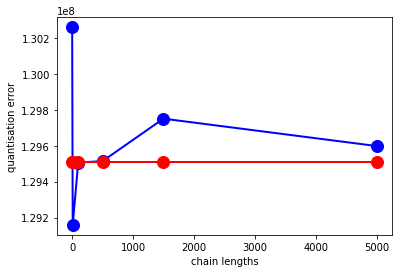

In [54]:
# Plotting the results for different chain lengths in both the cases
plt.plot(chain_lengths, qe_kmc2, color = 'blue', marker = 'o', linewidth=2, markersize=12, label = 'K-MCMC')
plt.plot(chain_lengths, qe_afkmc2, color = 'red', marker = 'o', linewidth=2, markersize=12, label = 'AFK-MCMC')
plt.xlabel('chain lengths')
plt.ylabel('quantisation error')
plt.show()

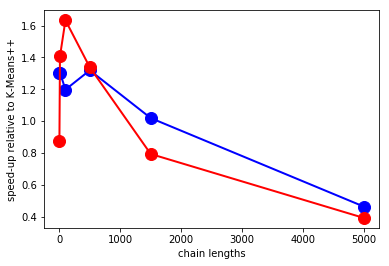

In [55]:
# Plotting the speedups for different chain lengths in both the cases
plt.plot(chain_lengths, su_kmc2, color = 'blue', marker = 'o', linewidth=2, markersize=12, label = 'K-MCMC')
plt.plot(chain_lengths, su_afkmc2, color = 'red', marker = 'o', linewidth=2, markersize=12, label = 'AFK-MCMC')
plt.xlabel('chain lengths')
plt.ylabel('speed-up relative to K-Means++')
plt.show()

### Reading Oxford Flower features

In [3]:
flowers_df = pd.read_csv('oxford_flowers_features.csv')
features = flowers_df.iloc[:,:].values

### Reading Protein Homology dataset

In [4]:
features_kdd = np.loadtxt('./bio_train.dat', delimiter='\t', dtype=float)

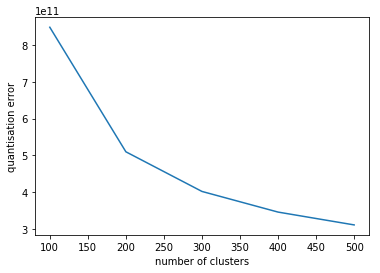

In [5]:
#finding optimum number of clusters for K-Means by Elbow method
from sklearn.cluster import KMeans

qe = [] #qe is the abbreviation for quantisation error
k_for_KMeans = [100,200,300,400,500]
for i in k_for_KMeans:
    kmeans = KMeans(n_clusters=i, init = 'k-means++', n_init = 1)
    kmeans.fit(features_kdd)
    qe.append(kmeans.inertia_)

plt.plot(k_for_KMeans, qe)
plt.xlabel('number of clusters')
plt.ylabel('quantisation error')
plt.show()

### Therefore, optimal number of clusters for Protein Homology dataset is 200

In [9]:
#calculate the time taken and the quantisation error on each of the methods
import time

start = time.clock()
qe1 = 0
for i in range(10):
    kmeans1 = KMeans(n_clusters=200, init = 'k-means++', n_init = 1)
    kmeans1.fit(features_kdd)
    qe1 += kmeans.inertia_
t1 = (time.clock()-start)/10
qe1 /= 10
print (t1,qe1)

start = time.clock()
qe2 = 0
for i in range(10):
    kmeans2 = KMeans(n_clusters=200, init = 'random', n_init = 1)
    kmeans2.fit(features_kdd)
    qe2 += kmeans.inertia_
t2 = (time.clock()-start)/10
qe2 /= 10
print (t2,qe2)

46.28615170261955 311170236819.84875
53.322510903043096 311170236819.84875


In [16]:
import kmc2

chain_lengths = [10,100,500,1000,2000]
qe_kmc2 = []
qe_afkmc2 = []
su_kmc2 = []    #speed-up for K-MCMC
su_afkmc2 = []  #speed-up for AFK-MCMC

for i in chain_lengths:
    qe3 = 0
    t3  = 0
    for j in range(10):
        seeding = kmc2.kmc2(features_kdd, 200, chain_length = i, afkmc2 = False) # Run K-MCMC with k=150 and variable chain length
        start = time.clock()
        kmeans3 = KMeans(n_clusters=200, init = seeding, n_init = 1)
        kmeans3.fit(features_kdd)
        t3 += (time.clock()-start)
        qe3 += kmeans3.inertia_
    t3 /= 10
    su_kmc2.append(t1/t3)
    qe3 = qe3/10
    print (t3,qe3)
    qe_kmc2.append(qe3)

for i in chain_lengths:
    qe4 = 0
    t4 = 0
    for j in range(10):
        seeding = kmc2.kmc2(features_kdd, 200, chain_length = i, afkmc2 = True) # Run AFK-MCMC with k=150 and variable chain length
        start = time.clock()
        kmeans4 = KMeans(n_clusters=200, init = seeding, n_init = 1)
        kmeans4.fit(features_kdd)
        t4 += (time.clock()-start)
        qe4 += kmeans3.inertia_
    t4 /= 10
    su_afkmc2.append(t1/t4)
    qe4 /= 10
    print (t4,qe4)
    qe_afkmc2.append(qe4)

38.77869020646303 575720128362.8018
38.78491732161892 550825240149.7529
41.03727249867207 531410406866.6637
41.83517716429397 528106889172.1908
48.500249108554996 525224336883.1764
44.2850810276359 518050778685.41437
41.94123745155703 518050778685.41437
38.92301087353481 518050778685.41437
42.91637492099144 518050778685.41437
39.51891522953447 518050778685.41437


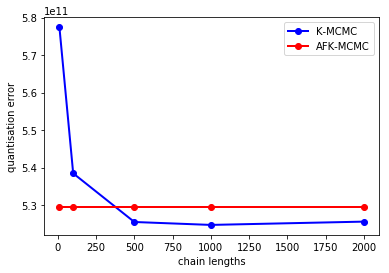

In [20]:
# Plotting the results for different chain lengths in both the cases
qe_kmc2_plot
qe_afkmc2_plot
plt.plot(chain_lengths, qe_kmc2_plot, color = 'blue', marker = 'o', linewidth=2, markersize=6, label = 'K-MCMC')
plt.plot(chain_lengths, qe_afkmc2_plot, color = 'red', marker = 'o', linewidth=2, markersize=6, label = 'AFK-MCMC')
plt.xlabel('chain lengths')
plt.ylabel('quantisation error')
plt.legend(loc='best')
plt.show()

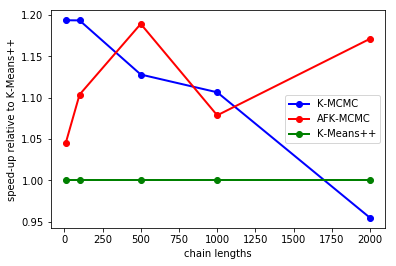

In [19]:
# Plotting the speedups for different chain lengths in both the cases
su_km = []
for i in chain_lengths:
    su_km.append(1)
plt.plot(chain_lengths, su_kmc2, color = 'blue', marker = 'o', linewidth=2, markersize=6, label = 'K-MCMC')
plt.plot(chain_lengths, su_afkmc2, color = 'red', marker = 'o', linewidth=2, markersize=6, label = 'AFK-MCMC')
plt.plot(chain_lengths, su_km, color = 'green', marker = 'o', linewidth=2, markersize=6, label = 'K-Means++')
plt.xlabel('chain lengths')
plt.ylabel('speed-up relative to K-Means++')
plt.legend(loc='best')
plt.show()